In [ ]:
%%sh
mkdir -p fin
ls -lr Finance/*.csv | awk -F " " '{print $9 }' | xargs -n1 cat | awk -F "," '{if (substr( $1, length($1) - 5, 2 ) != "CE" && substr( $1, length($1) - 5, 2 ) != "PE" ) {print $0 >> ("fin/"$1".csv") ; close("fin/"$1".csv");}}'
# creates a pipeline to distribute files on symbol basis as opposed to date
# map by daily file names and reduce by ticker_name
# dont forget ro run this as a background screen operation it could take upto 20-30 minutes due to IO operations

In [161]:
%matplotlib inline
import pandas as pd

filename = "fin/ICICIBANK-III.NFO.csv"
dateparse = lambda d,t: pd.datetime.strptime(d+"-"+ t.strip() , '%d/%m/%Y-%H:%M:%S')
df = pd.read_csv(filename,index_col=["TimeStamp"], header=0,parse_dates={'TimeStamp': ['Date','Time']},
                 date_parser=dateparse,usecols=['Date','Time',"Close","Open","High","Low","Open Interest","Volume"],
                names=["Ticker","Date","Time","Open","High","Low","Close","Volume","Open Interest"])
df["Open"].plot(figsize=(20,10))

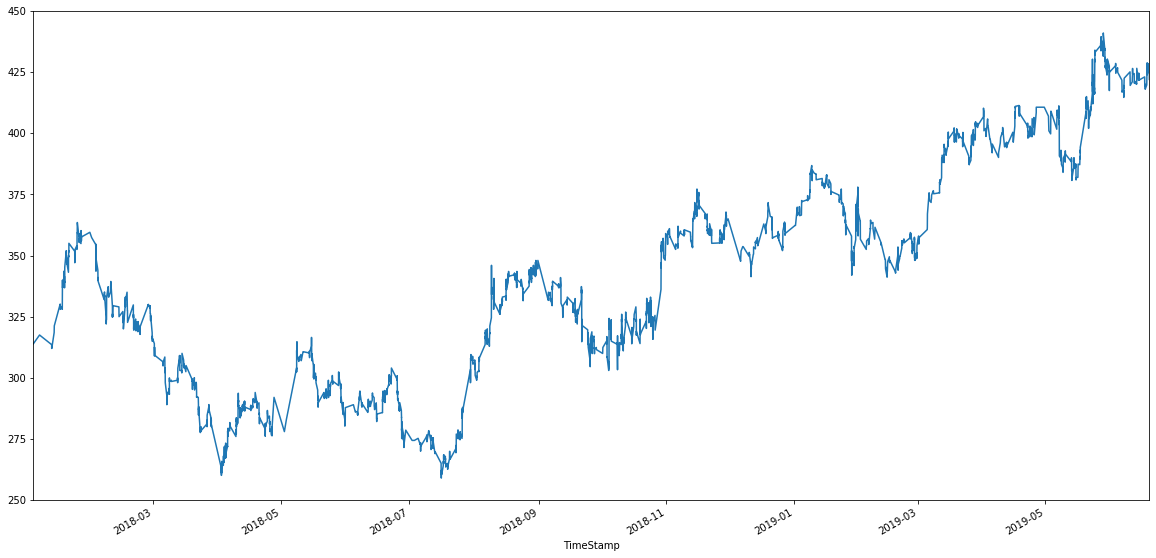

    General strategy is to build differentially incremental pipelines that would build features for each stock at multiple frequency, concat the feature list with original frequency vector. 
    Expect a Tensor of (40+60)*20 for each stock 40 features , 60 being actual data points withint the given frequency, and 20 being the number of frequencies 
    Feed forward this with multiple independent layers 
    This feature matrix will produce a multi headed matrix whih is essentially response of each investor type to these features 
    which should be something like a 20*10 matrix 20 for each frequency typ and 10 for investor types.
    At this point its worth applying a self attention layer just to ensure the model can consider all other investor types before taking decision.
    One could also consider a cross stock attention layer here
    Last layer would be a fully connected layer making 20 predicions for each frequency.
